<a href="https://colab.research.google.com/github/wakassodev/Brain-Tumor-Classification/blob/main/Headstarter_AI_Project_2_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:01<00:00, 156MB/s]
100% 149M/149M [00:01<00:00, 132MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it is a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0519.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0615.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_1262.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0056.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0571.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0398.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0351.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0998.jpg,glioma
5710,/content/Training/glioma/Tr-gl_1045.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0066.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0231.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0190.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0016.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0261.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0207.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0205.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0139.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0215.jpg,glioma


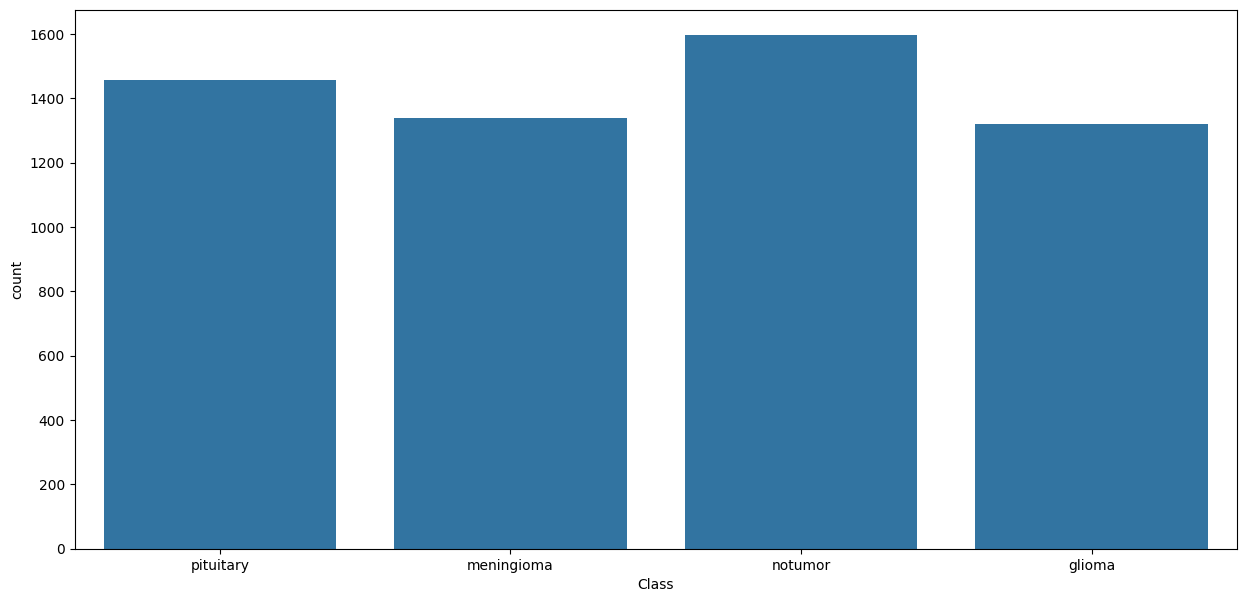

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

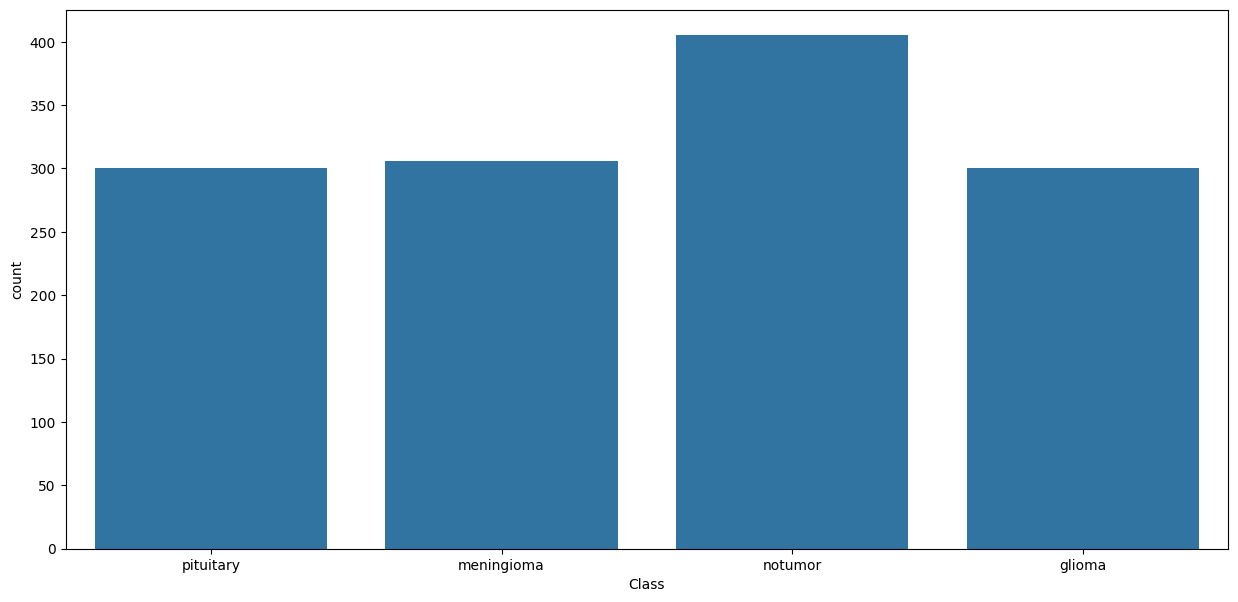

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5,  stratify=ts_df["Class"])

In [ ]:
valid_df

,Class Path,Class
806,/content/Testing/notumor/Te-no_0209.jpg,notumor
660,/content/Testing/notumor/Te-no_0192.jpg,notumor
553,/content/Testing/meningioma/Te-me_0077.jpg,meningioma
860,/content/Testing/notumor/Te-no_0339.jpg,notumor
145,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
...,...,...
896,/content/Testing/notumor/Te-no_0220.jpg,notumor
277,/content/Testing/pituitary/Te-pi_0251.jpg,pituitary
1092,/content/Testing/glioma/Te-gl_0023.jpg,glioma
318,/content/Testing/meningioma/Te-me_0140.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
441,/content/Testing/meningioma/Te-me_0011.jpg,meningioma
1025,/content/Testing/glioma/Te-gl_0182.jpg,glioma
542,/content/Testing/meningioma/Te-me_0207.jpg,meningioma
452,/content/Testing/meningioma/Te-me_0055.jpg,meningioma
1200,/content/Testing/glioma/Te-gl_0012.jpg,glioma
...,...,...
720,/content/Testing/notumor/Te-no_0364.jpg,notumor
863,/content/Testing/notumor/Te-no_0378.jpg,notumor
42,/content/Testing/pituitary/Te-pi_0173.jpg,pituitary
812,/content/Testing/notumor/Te-no_0358.jpg,notumor


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


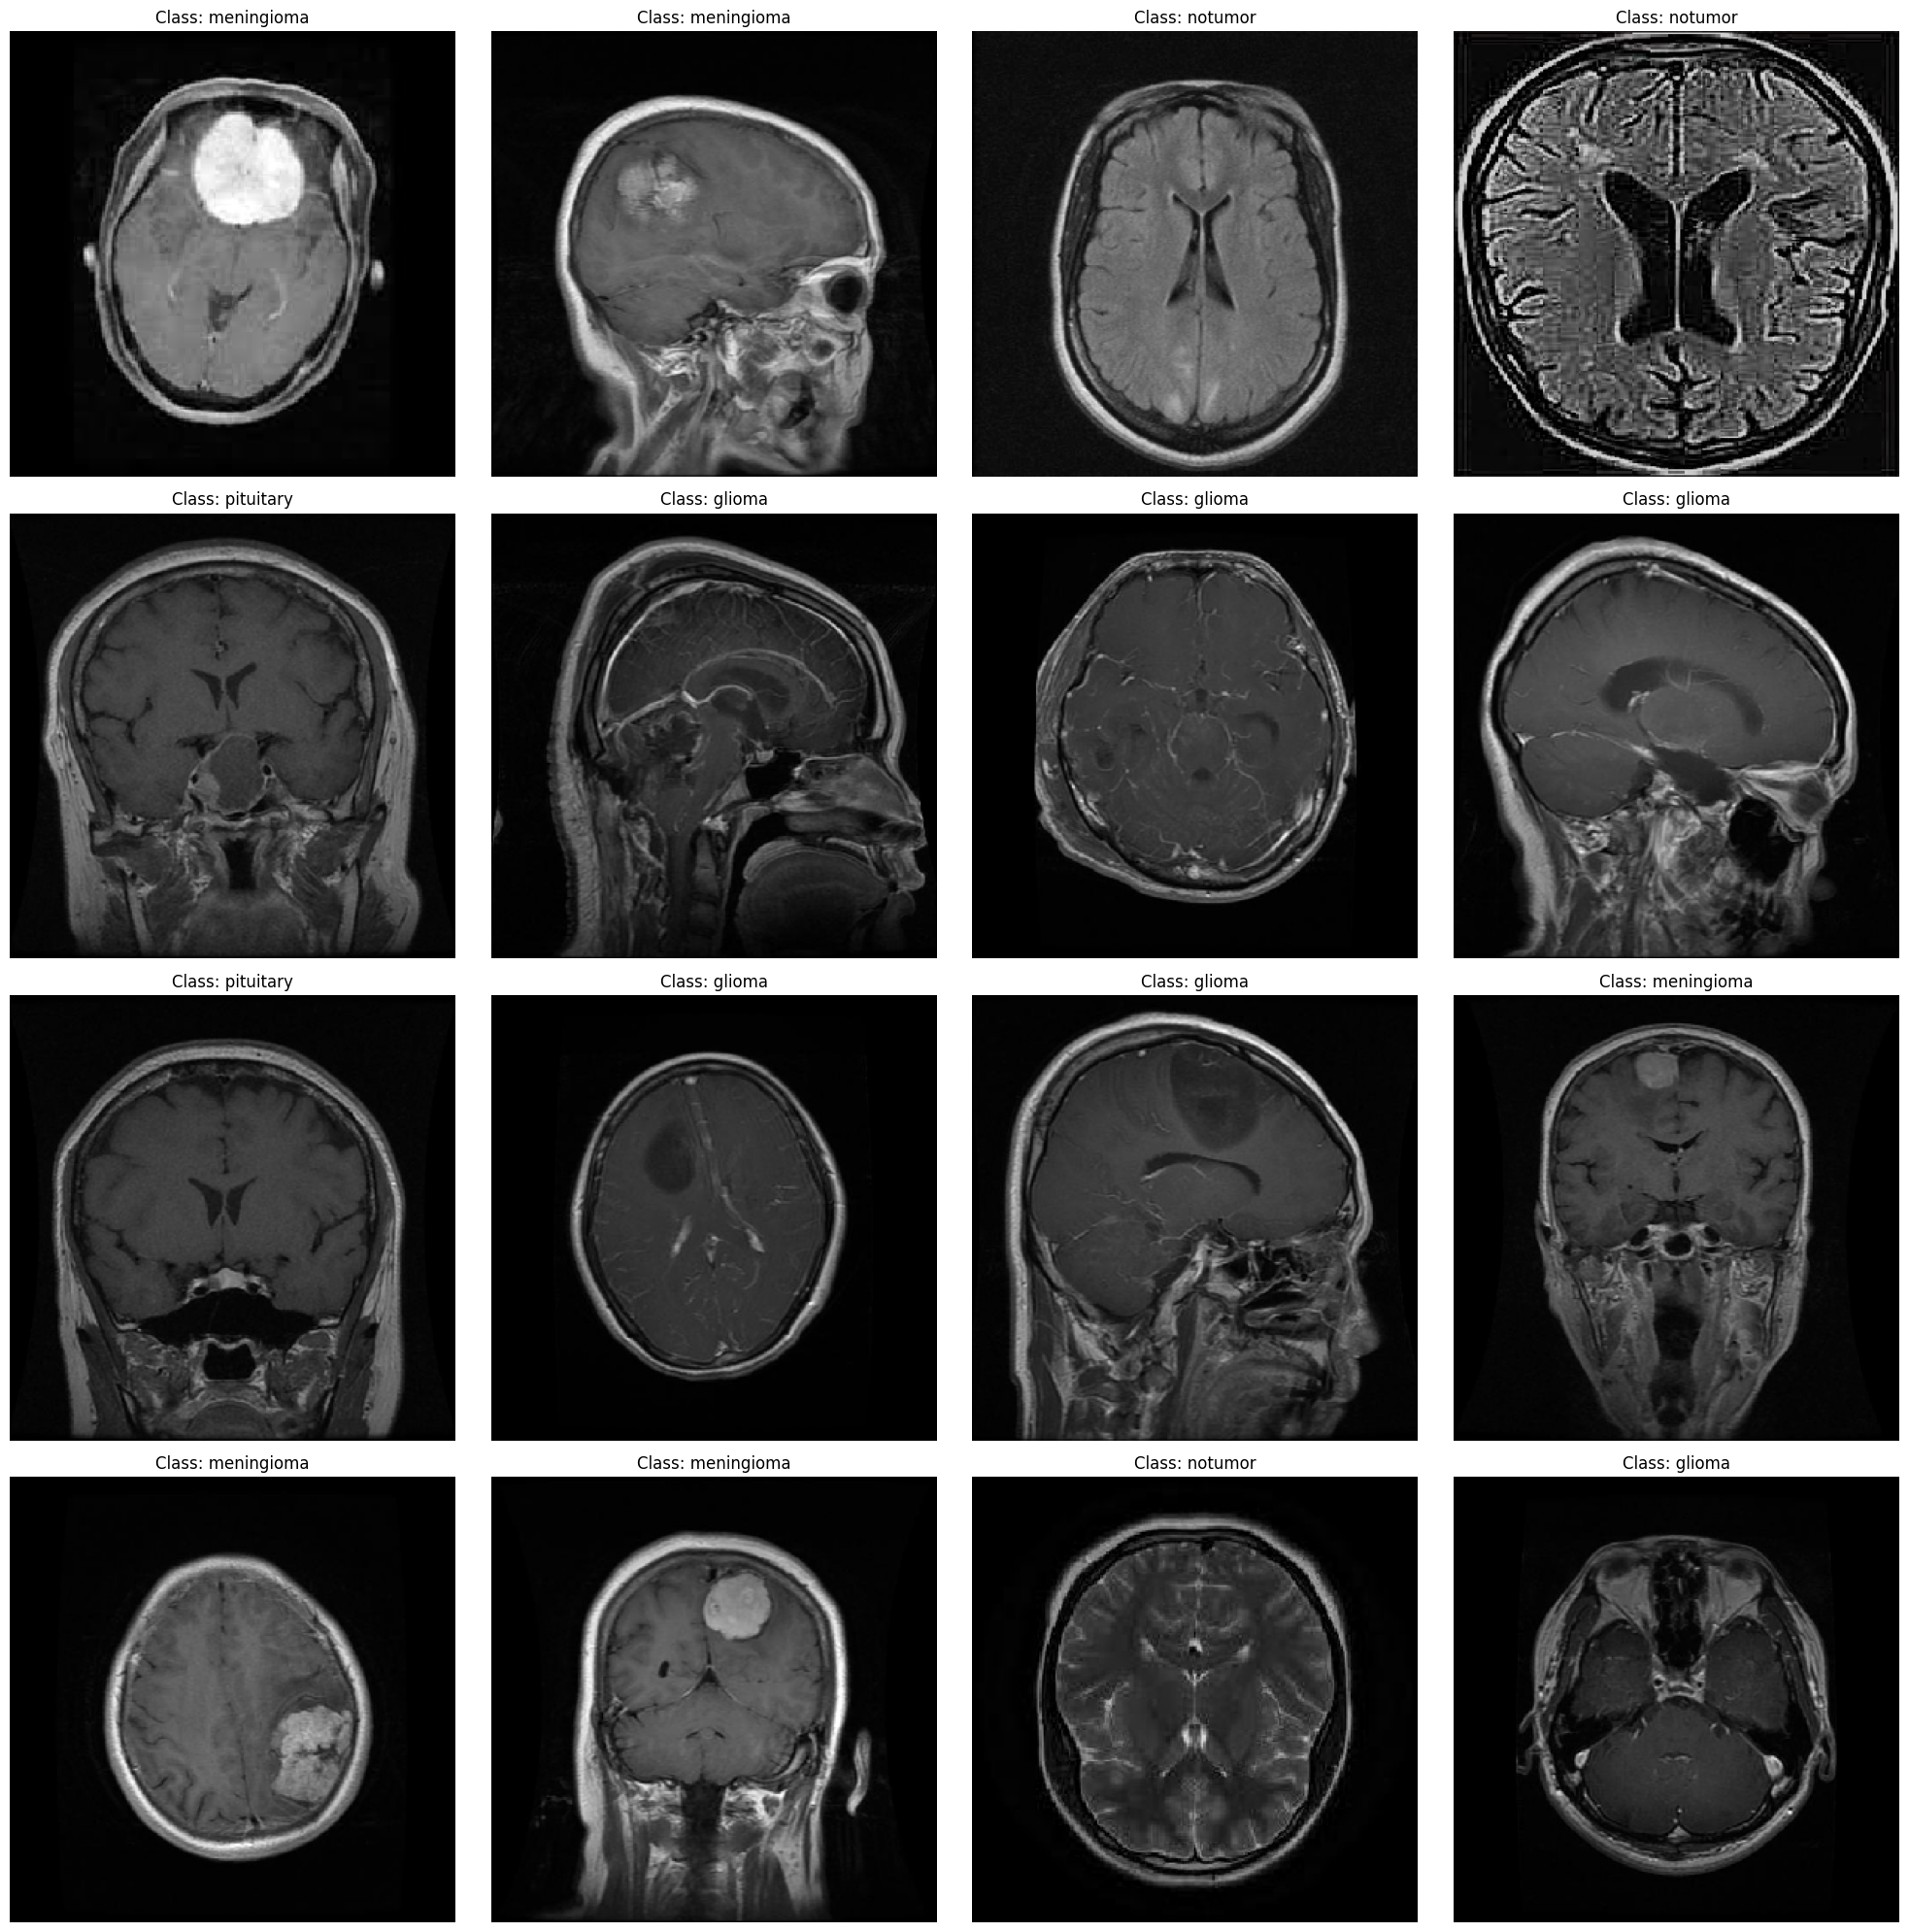

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the  class index
  class_index = np.argmax(label)

  # Get the list of class names and  indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show;

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top = False,
                                             weights = "imagenet",
                                             input_shape = img_shape,
                                             pooling = "max")

# Define the input tensor with the correct shape
input_tensor = tf.keras.Input(shape=img_shape)

# Pass the input tensor through the base model
x = base_model(input_tensor)

# Apply the remaining layers
x = Flatten()(x)
x = Dropout(rate = 0.3)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(rate = 0.25)(x)
x = Dense(4, activation = 'softmax')(x)

# Create the model
model = tf.keras.Model(inputs=input_tensor, outputs=x)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.6782 - loss: 0.9169 - precision: 0.7469 - recall: 0.5182 - val_accuracy: 0.9298 - val_loss: 0.2142 - val_precision: 0.9348 - val_recall: 0.9191
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 775ms/step - accuracy: 0.9654 - loss: 0.0984 - precision: 0.9695 - recall: 0.9610 - val_accuracy: 0.9664 - val_loss: 0.0857 - val_precision: 0.9694 - val_recall: 0.9664
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 774ms/step - accuracy: 0.9917 - loss: 0.0277 - precision: 0.9928 - recall: 0.9917 - val_accuracy: 0.9893 - val_loss: 0.0319 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 775ms/step - accuracy: 0.9919 - loss: 0.0254 - precision: 0.9930 - recall: 0.9911 - val_accuracy: 0.9924 - val_loss: 0.0180 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 774ms/step - accuracy: 0.9963 - loss: 0.0108 - precision: 0.9965 - recall: 0.9961 - val_accuracy: 0.9954 - val_loss: 

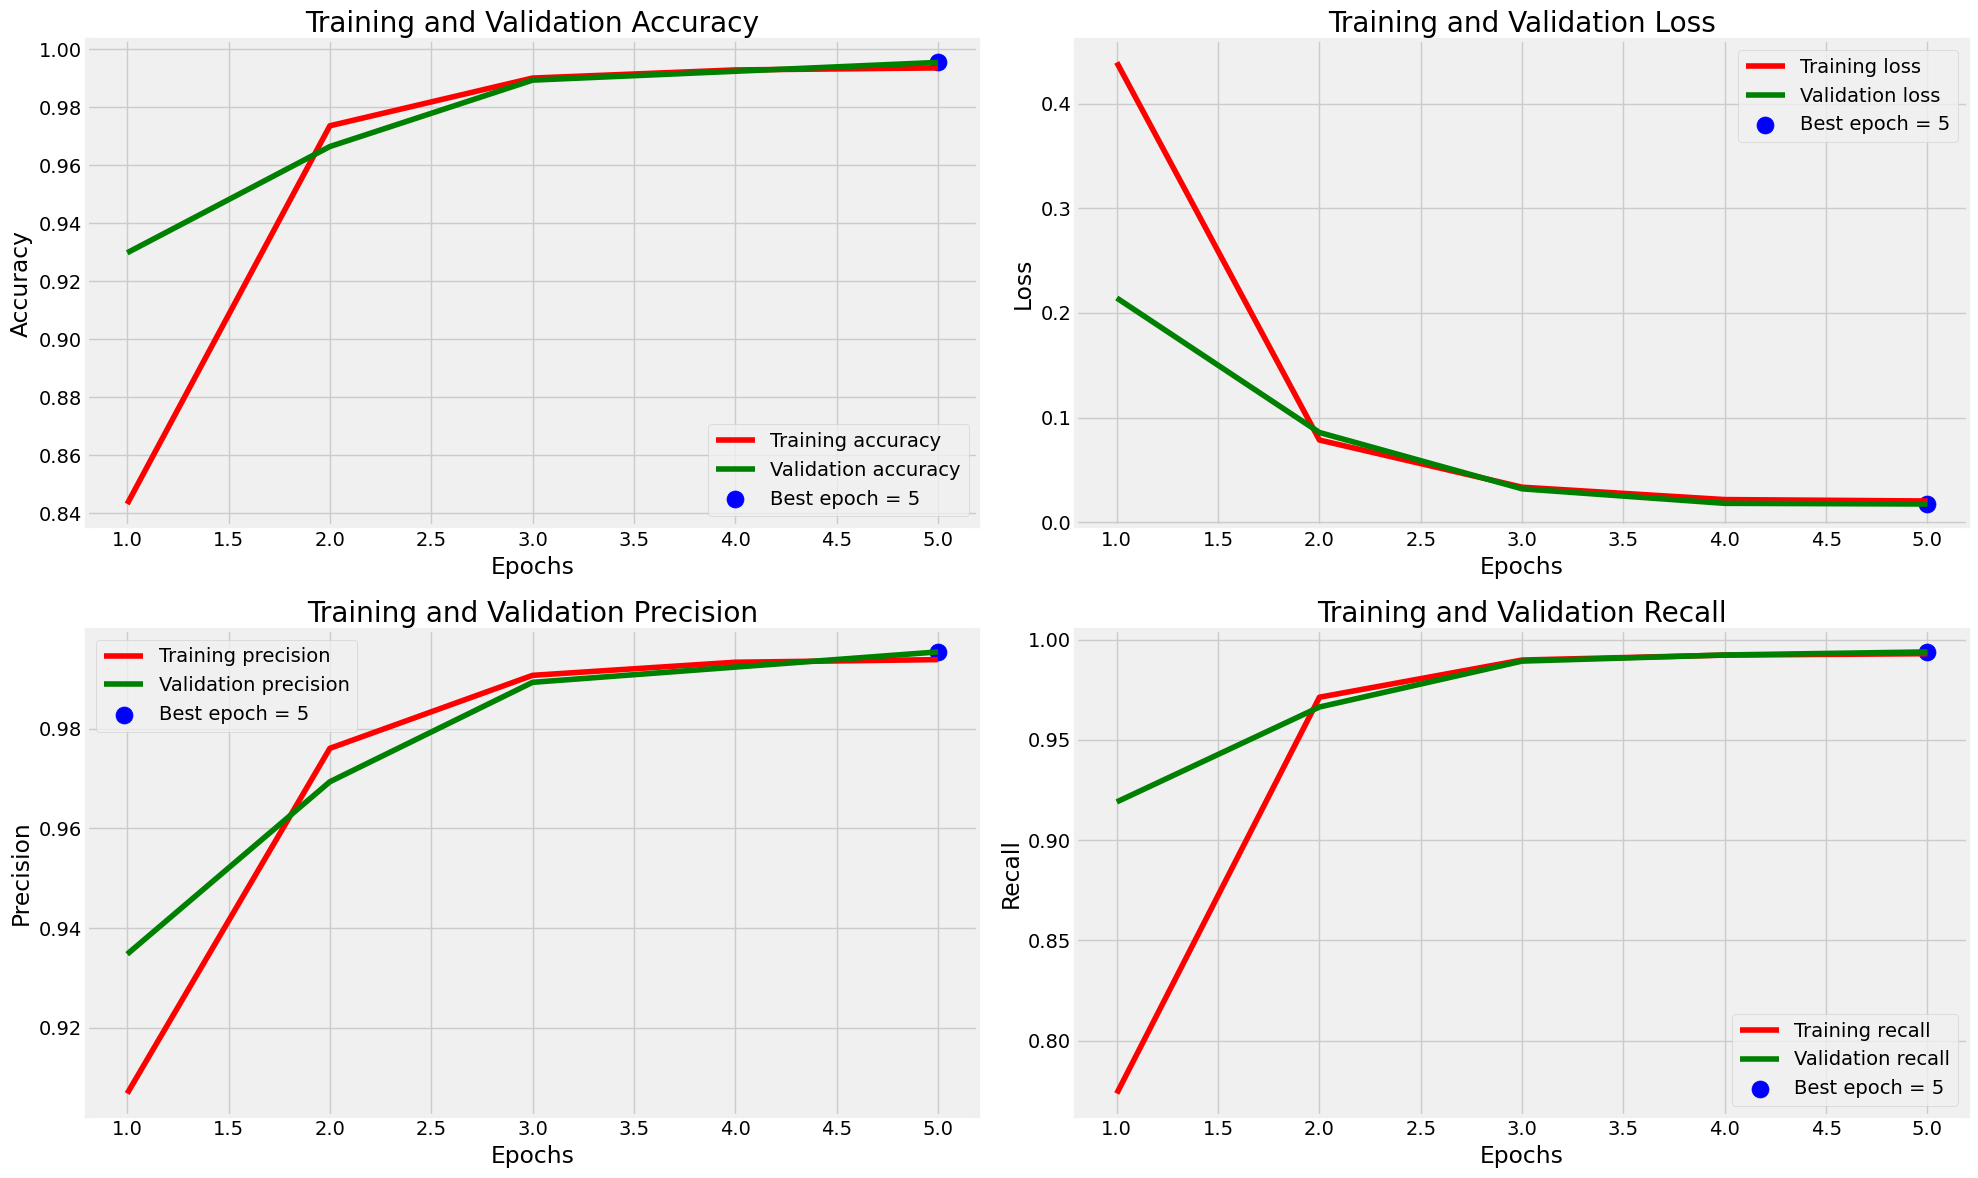

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}
# tr_metrics = {m: hist.history.get(m, hist.history.get(f'{m}')) for m in metrics}
# val_metrics = {m: hist.history.get(f'val_{m}', None) for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == "loss":
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show;

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - accuracy: 0.9975 - loss: 0.0067 - precision: 0.9975 - recall: 0.9975
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.9961 - loss: 0.0170 - precision: 0.9961 - recall: 0.9958
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 1.0000 - loss: 0.0010 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9921 - loss: 0.0222 - precision: 0.9921 - recall: 0.9921
Train Accuracy: 99.75%
Train Loss: 0.0077


Validation Accuracy: 99.54%
Validation Loss: 0.0174


Test Accuracy: 99.24%
Test Loss: 0.0233


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step


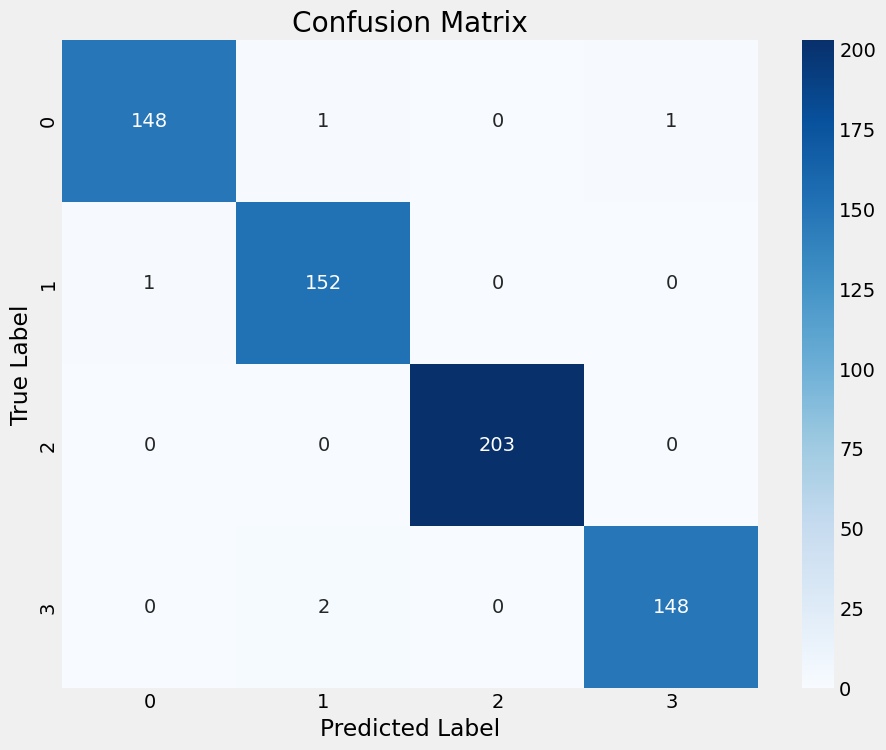

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list (class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get predicted predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    # Show plot
    plt.tight_layout()
    plt.show()

    print(f'\n\nPredicted tumor type: {predicted_class}')


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


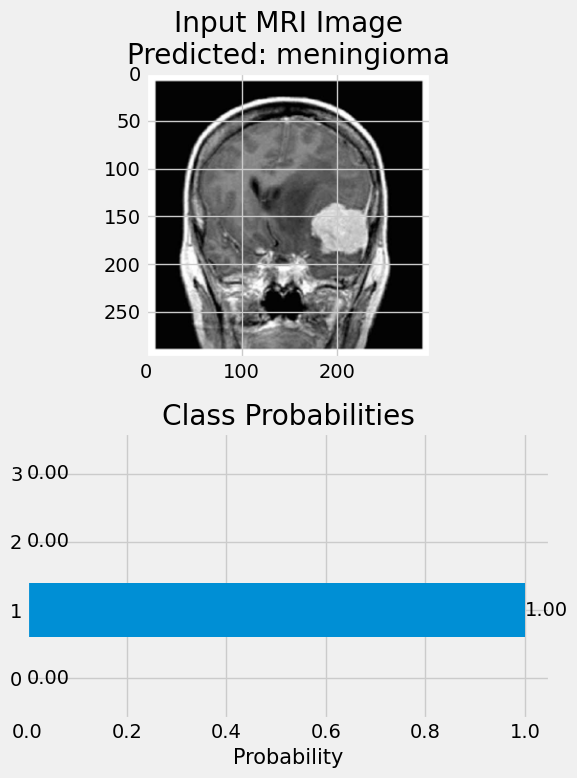



Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-me_0014.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")